## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

**1. Do mostly of left-handedness people, being an introvert?**

**2. Do people with left-handedness are male or female the most?**  

**3. Do female with heterosexual tend to be right handedness?**

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np    
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('./data.csv',sep='\t')

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

- From the research paper, I decided to use gender, orientation, liveliness(the quality of being outgoing, energetic, and enthusiastic.), and the activities related with brain control.

citation : 

1. SEX - handedness : Bobrova EV, Reshetnikova VV, Vershinina EA, Grishin AA, Bobrov PD, Frolov AA, Gerasimenko YP. Success of Hand Movement Imagination Depends on Personality Traits, Brain Asymmetry, and Degree of Handedness. Brain Sciences. 2021; 11(7):853. https://doi.org/10.3390/brainsci11070853
2. Orientation - handedness : https://en.wikipedia.org/wiki/Handedness_and_sexual_orientation#:~:text=Although%20a%20significantly%20higher%20proportion,with%20respect%20to%20hand%20preference.

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [7]:
df.info()
# only 1 feature is object type but it is not necessary, so we could drop it.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 1 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           3994 non-null   int64 
 1   Q2           3994 non-null   int64 
 2   Q3           3994 non-null   int64 
 3   Q4           3994 non-null   int64 
 4   Q5           3994 non-null   int64 
 5   Q6           3994 non-null   int64 
 6   Q7           3994 non-null   int64 
 7   Q8           3994 non-null   int64 
 8   Q9           3994 non-null   int64 
 9   Q10          3994 non-null   int64 
 10  Q11          3994 non-null   int64 
 11  Q12          3994 non-null   int64 
 12  Q13          3994 non-null   int64 
 13  Q14          3994 non-null   int64 
 14  Q15          3994 non-null   int64 
 15  Q16          3994 non-null   int64 
 16  Q17          3994 non-null   int64 
 17  Q18          3994 non-null   int64 
 18  Q19          3994 non-null   int64 
 19  Q20          3994 non-null 

In [4]:
# Clean up target variables

# Why would drop zero value?
# A: small % of values and we're clear on what 0 means. But we think it's likely a missing value stand-in

# Why do we do about value of 3?
# We're unable to differentiate between dominant hand.
# Also, larger % of 'hand' values but not overwhelming in terms of row or information loss.

df = df[(df['hand'] != 0) & (df['hand'] != 3)]

In [5]:
df.shape

(3994, 56)

In [6]:
# There is no NaN values in any columns
df.isnull().sum()[df.isnull().sum() != 0] 

Series([], dtype: int64)

In [8]:
# Select specific features
data = df[['Q1','Q6','Q26','Q14','Q13','Q29','Q2','gender','orientation','hand']]


# data = data[ (data['Q6'] != 0) & (data['Q13'] != 0) &(data['Q29'] != 0)&(data['Q1'] != 0) \
#      & (data['Q14'] != 0) & (data['Q26'] != 0) & (data['gender'] != 0)  &(data['Q2'] != 0)\
#           &  (data['gender'] != 3) & (data['orientation'] != 0)\
#      & (data['hand'] != 0) & (data['hand'] != 3)]

In [9]:
#  loop through every column and filter out zero value
for i in data:
    data = data[data[i] != 0]

In [14]:
# We could find 3 as an option, so we drop it cause of low proportion of rows.
data = data[data['gender'] != 3]

In [16]:
# Check whether there is zero or not. No more zero.
data['Q6'].value_counts()

5    1256
4     939
3     597
1     381
2     334
Name: Q6, dtype: int64

In [17]:
# make left hand = 1, right hand = 0

data['hand'] = data['hand'].map({1:0,2:1})

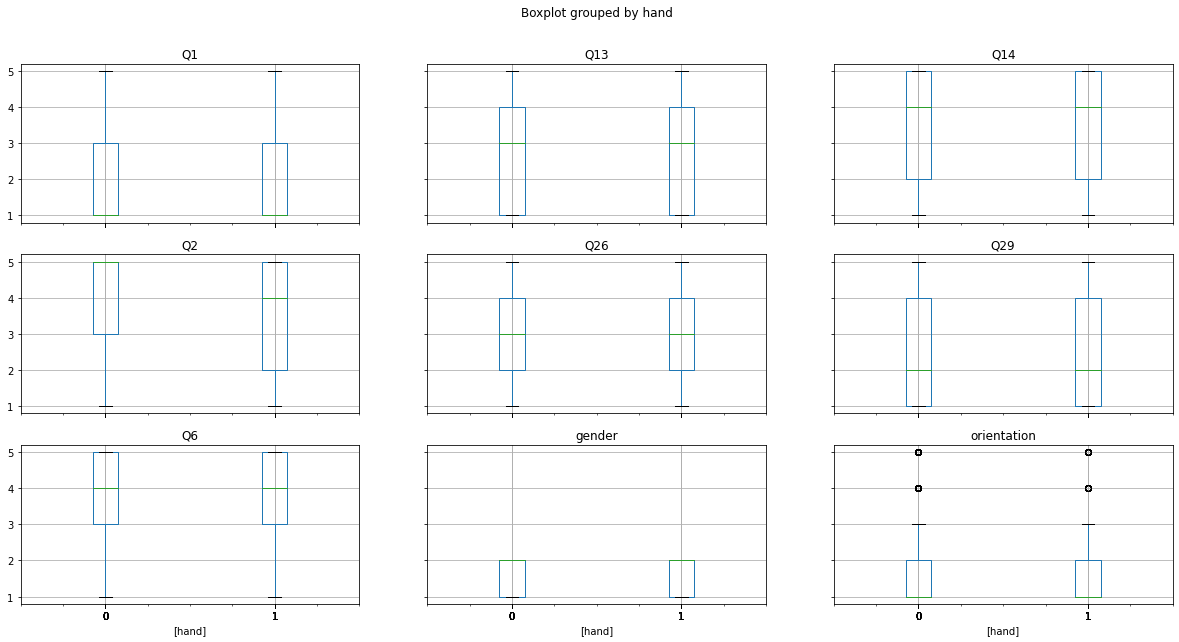

In [19]:
# Plot of median of value in each features selected
fig,ax = plt.subplots(figsize=(20,10))
data.boxplot(by='hand',ax=ax);
# There is no significant difference in any features.

- ##### The selected features have no differences between right-handedness & left-handedness

### Calculate and interpret the baseline accuracy rate:

In [ ]:
# Options...

# Addressing the class label imbalance switching k at 90/10 split
# made no significant difference in models predictive accuracy

# Find left-handed people to survey
# Oversampling the majority class
# Undersampling the majority class
# A bit both (SMOTE) --> Synthetic minority over-sampling technique.
# Algorithmically increase the number of your cases in your dataset in a more balanced key.


In [20]:
data['hand'].value_counts(normalize=True)

# We are interested in 1, which is number of people who being left-handedness.
# So the baseline score of left-handed is the majority class which is right-handedness at 88.9%


# If the algorithm just selected the majority of its predictions of y
# Algorithmic equivalent --> Dummyclassifier set to'most_frequent'

0    0.889364
1    0.110636
Name: hand, dtype: float64

### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

- the regression based on: numerics answers 
- the classifications based on : binary or multiclass answers like 0,1 or categorical values.

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

- the smaller in k may lead --> the higher in variance (overfitted)
- optimal k --> 'the sweet spot' --> neither underfitting or overfitting
- the bigger in k may lead --> the higher in bias (underfitted)

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

- predictor variables --> features

- KNN is distance based algorithm and scale/magnitude of features impacts perfomance and output like the unit of categorical variables are varies , e.g. different in magnitude--> so wee need to scaled to doing a comparison.

- Standardization --> rescales values in the features columns to have each column possess a **mean of zero and std of 1**

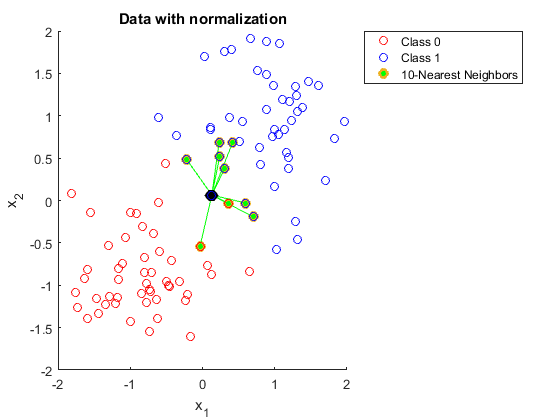

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

- Possibly not this time as all our features to be used are ranged from 1-5. Already on the same or very similar scale.



#### How do we settle on $k$ for a $k$-nearest neighbors model?

- Use the default
- Guess
- Loop/iterate through a range of k options and select the optimal one based on score.

#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

- default is 'L2', which is Ridge regularization

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

- C is the inverse of regularization strength, which regularization strength of regularization is alpha.
- So, C is inversely related to alpha.



- Higher C --> lower alpha


#### Describe the relationship between regularization strength and the bias-variance tradeoff:

- Why ? Avoid error due to high variance (overfitting)
- When? high model complexity which is leading to overfitting.


- the higher in alpha (regulrization strength) or the lower in C, the less on variance occurs, but if overdone the more on bias.

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

- Interpretable

- KNN is a non-parametric model, where Logistic regression is a parametric model. Which mean, the logistic regression has parameters to explained the scenarios. 

 Explaining to a  non-technical individual?
- In terms of explaining conceptually to a non-technical audience though it could be that kNN is easier to explain at a high level than LogReg.

 Explaining relationship in a meaningful and actionable way?
- KNN fails and logreg is better



- Both are classifiers (LogReg and knn classifier) so they have some similarities like decision boundaries between the class labels but also have some core differences such as one being parametric and one not. So conceptually, some similarities but fairly different in the details.

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be 

In [21]:
X = data.drop(columns = 'hand')
y = data['hand']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# No need to scale because the unit of X features are all the same

In [25]:
# Checking the distribution of class labels in y_train & y_test
y_train.value_counts(normalize = True)

0    0.888213
1    0.111787
Name: hand, dtype: float64

In [26]:
y_test.value_counts(normalize = True)
# no need to stratify 


0    0.892816
1    0.107184
Name: hand, dtype: float64

#### Create and fit four separate $k$-nearest neighbors models: one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$:

In [27]:
# model 1
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train,y_train)
y1 = knn_3.predict(X_test)

In [28]:
# model2
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)
y2 = knn_5.predict(X_test)

In [29]:
# model 3
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train,y_train)
y3 = knn_15.predict(X_test)

In [30]:
# model 4
knn_25 = KNeighborsClassifier(n_neighbors=25)
knn_25.fit(X_train,y_train)
y4 = knn_25.predict(X_test)

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [31]:
data['hand'].value_counts(normalize=True)

0    0.889364
1    0.110636
Name: hand, dtype: float64

In [52]:
data['hand'].value_counts()

0    3119
1     388
Name: hand, dtype: int64

Train score : 0.9026615969581749
Test score : 0.8779931584948689
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       783
           1       0.16      0.03      0.05        94

    accuracy                           0.88       877
   macro avg       0.53      0.51      0.49       877
weighted avg       0.82      0.88      0.84       877



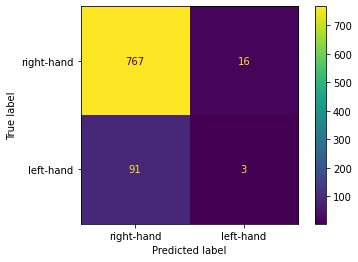

In [33]:
# model 1
print(f'Train score : {knn_3.score(X_train,y_train)}')
print(f'Test score : {knn_3.score(X_test,y_test)}')

plot_confusion_matrix(knn_3,X_test,y_test,display_labels=['right-hand','left-hand'])
print(metrics.classification_report(y_test,y1))


# model 1 is in sweet spot!. Also, the accuray rate also beat the baseline score, 
# as you can see from the confusion matrix, The prediction of left-handedness that predicted correct is 13% 


# macro avg is use to compare how good our model is..

In [53]:
y_test.value_counts()

0    783
1     94
Name: hand, dtype: int64

Train score : 0.8889733840304183
Test score : 0.8905359179019384
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       783
           1       0.38      0.03      0.06        94

    accuracy                           0.89       877
   macro avg       0.64      0.51      0.50       877
weighted avg       0.84      0.89      0.85       877



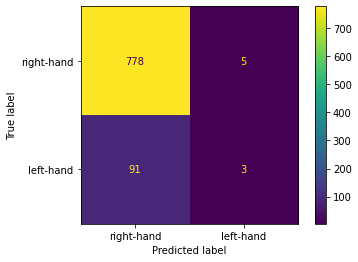

In [34]:
# model 2
print(f'Train score : {knn_5.score(X_train,y_train)}')
print(f'Test score : {knn_5.score(X_test,y_test)}')
plot_confusion_matrix(knn_5,X_test,y_test,display_labels=['right-hand','left-hand'])
print(metrics.classification_report(y_test,y2))
#  this model is unbias 

Train score : 0.888212927756654
Test score : 0.8928164196123147
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       783
           1       0.00      0.00      0.00        94

    accuracy                           0.89       877
   macro avg       0.45      0.50      0.47       877
weighted avg       0.80      0.89      0.84       877



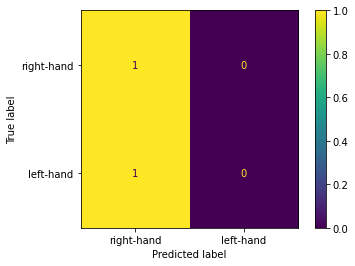

In [39]:
# model 3
print(f'Train score : {knn_15.score(X_train,y_train)}')
print(f'Test score : {knn_15.score(X_test,y_test)}')
plot_confusion_matrix(knn_15,X_test,y_test,display_labels=['right-hand','left-hand'],normalize='true')
print(metrics.classification_report(y_test,y3))
#  this model is unbias 

Train score : 0.888212927756654
Test score : 0.8928164196123147
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       783
           1       0.00      0.00      0.00        94

    accuracy                           0.89       877
   macro avg       0.45      0.50      0.47       877
weighted avg       0.80      0.89      0.84       877



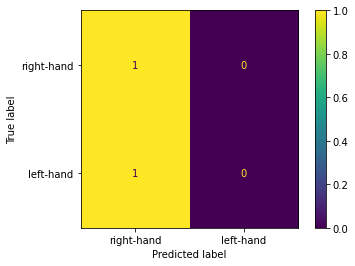

In [40]:
#  model 4
print(f'Train score : {knn_25.score(X_train,y_train)}')
print(f'Test score : {knn_25.score(X_test,y_test)}')
plot_confusion_matrix(knn_25,X_test,y_test,display_labels=['right-hand','left-hand'],normalize='true')
print(metrics.classification_report(y_test,y4))
#  this model is unbias 

In [36]:
k_scores = pd.DataFrame(columns=['k','train_score','test_score'])

for n,k in enumerate([3,5,15,25]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_preds = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    k_scores.loc[n] = [k,train_score,test_score]

In [37]:
k_scores

,k,train_score,test_score
0,3.0,0.902662,0.877993
1,5.0,0.888973,0.890536
2,15.0,0.888213,0.892816
3,25.0,0.888213,0.892816


---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as above.

In [41]:
# Scale the data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [42]:
# Instantiate
logreg_1 = LogisticRegression(penalty='l1',C=1,solver='saga')
logreg_1.fit(Z_train,y_train) # use scaled data because we're using penalty term
y1_log = logreg_1.predict(Z_test)

In [43]:
logreg_10 = LogisticRegression(penalty='l1',C=0.1,solver='saga')
logreg_10.fit(Z_train,y_train)
y2_log = logreg_10.predict(Z_test)

In [44]:
logreg_1_rd = LogisticRegression(C=1,solver='saga')
logreg_1_rd.fit(Z_train,y_train)
y3_log = logreg_1_rd.predict(Z_test)

In [45]:
logreg_10_rd = LogisticRegression(C=0.1,solver='saga')
logreg_10_rd.fit(Z_train,y_train)
y4_log = logreg_10_rd.predict(Z_test)

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [46]:
# model 1
print(f'Train score : {logreg_1.score(Z_train,y_train)}')
print(f'Test score : {logreg_1.score(Z_test,y_test)}')
print(metrics.classification_report(y_test,y1_log))


Train score : 0.888212927756654
Test score : 0.8928164196123147
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       783
           1       0.00      0.00      0.00        94

    accuracy                           0.89       877
   macro avg       0.45      0.50      0.47       877
weighted avg       0.80      0.89      0.84       877



In [47]:
# model 2
print(f'Train score : {logreg_10.score(Z_train,y_train)}')
print(f'Test score : {logreg_10.score(Z_test,y_test)}')
print(metrics.classification_report(y_test,y2_log))


Train score : 0.888212927756654
Test score : 0.8928164196123147
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       783
           1       0.00      0.00      0.00        94

    accuracy                           0.89       877
   macro avg       0.45      0.50      0.47       877
weighted avg       0.80      0.89      0.84       877



In [50]:
# model 3
print(f'Train score : {logreg_1_rd.score(Z_train,y_train)}')
print(f'Test score : {logreg_1_rd.score(Z_test,y_test)}')
print(metrics.classification_report(y_test,y3_log))


Train score : 0.888212927756654
Test score : 0.8928164196123147
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       783
           1       0.00      0.00      0.00        94

    accuracy                           0.89       877
   macro avg       0.45      0.50      0.47       877
weighted avg       0.80      0.89      0.84       877



In [51]:
# model 4
print(f'Train score : {logreg_10_rd.score(Z_train,y_train)}')
print(f'Test score : {logreg_10_rd.score(Z_test,y_test)}')
print(metrics.classification_report(y_test,y4_log))


Train score : 0.888212927756654
Test score : 0.8928164196123147
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       783
           1       0.00      0.00      0.00        94

    accuracy                           0.89       877
   macro avg       0.45      0.50      0.47       877
weighted avg       0.80      0.89      0.84       877



---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? What are the "best" models?

- recall values in the reports is the measurement on how many of the positive cases are predicted correctly. From all of the model the KNN model with k =3 and 5 in the recall predicting 1 (left-handedness) give that the model can predict left-handedness correctly only 3% of all left-handedness, which is around 3 person out of 94 left-handedness people .The rest of the models can't predict left-handedness at all. This is because of the improper of data acquation and the imbalance of classes. However the knn model with n_neighbors of 5 is the best, because it reduce the number of false positive (predicting left-handedness wrong) and increase in true negative.